In [1]:
import shap 
import xgboost
import numpy as np
import pandas as pd
from pickle import load
import matplotlib.pyplot as plt
shap.initjs()

In [2]:
np.random.seed(0)

## load food tree data
X_train = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_train_taxahfe_no_sf.csv", index_col=0, header=0)
y_train = pd.read_csv("../../../data/04/processed_for_ml/binary_class/y_train_class.csv", index_col = 0, header = 0 )
x_test = pd.read_csv('../../../data/04/processed_for_ml/binary_class/x_test_no_sf.csv', index_col=0)
y_test = pd.read_csv('../../../data/04/processed_for_ml/binary_class/y_test_class.csv', index_col=0)
x_test = x_test[X_train.columns] # reordered columns to match (column ordered changed during taxahfe)

X_train_diet = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_train_taxahfe_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_test_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = x_test_diet[X_train_diet.columns] # reordered columns to match (column ordered changed during taxahfe)

X_train = X_train.sort_index(axis = 0)
y_train = y_train.sort_index(axis = 0)
x_test = x_test.sort_index(axis = 0)
y_test = y_test.sort_index(axis = 0)

x_in = pd.concat([X_train, x_test])
x_diet_in = pd.concat([X_train_diet, x_test_diet])
y_in = pd.concat([y_train, y_test])

mod = load(open("../food_tree/model/xgboost_binary_class.pkl", "rb"))
diet_mod = load(open("../food_tree/model/xgboost_binary_class_diet.pkl", "rb"))

In [3]:
print("Mod params: {}".format(mod))

Mod params: RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                 

In [4]:
xgb_mod = mod.best_estimator_.named_steps['model']

In [5]:
xgb_mod

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=0, ...)

In [6]:
feature_names = x_test.columns

In [8]:
explainer = shap.TreeExplainer(xgb_mod)
shap_values = explainer.shap_values(x_test)

[13:06:16] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


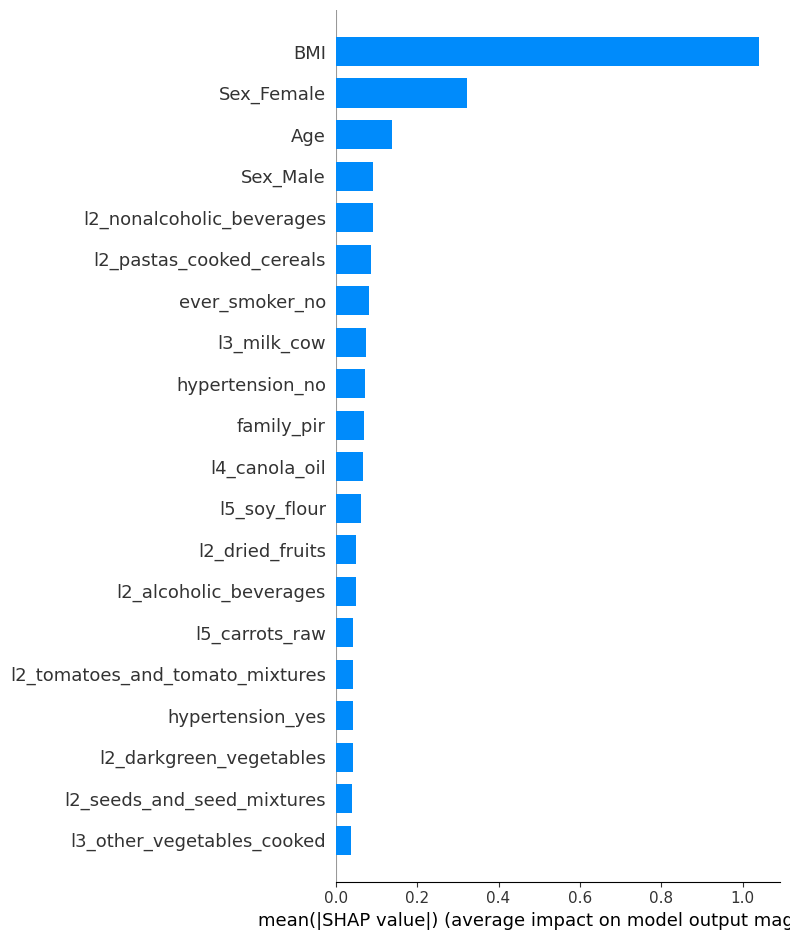

In [9]:
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_names)

In [10]:
feature_names

Index(['l3_milk_cow', 'l1_meat_poultry_fish_and_mixtures', 'l1_eggs',
       'l5_soy_flour', 'l2_seeds_and_seed_mixtures',
       'l2_pastas_cooked_cereals', 'l2_dried_fruits',
       'l3_white_potatoes_baked_and_boiled', 'l2_darkgreen_vegetables',
       'l5_carrots_raw', 'l2_tomatoes_and_tomato_mixtures', 'l5_garlic',
       'l3_other_vegetables_cooked', 'l2_fats', 'l4_canola_oil',
       'l2_nonalcoholic_beverages', 'l2_alcoholic_beverages', 'Age',
       'family_pir', 'BMI', 'Sex_Female', 'Sex_Male',
       'education_college graduate',
       'education_high school graduate or equivalent',
       'education_less than high school graduate', 'education_some college',
       'Ethnicity_Mexican_American', 'Ethnicity_Non-Hispanic_Black',
       'Ethnicity_Non-Hispanic_White', 'Ethnicity_Other_Hispanic',
       'Ethnicity_Other_Multi-Racial', 'ever_smoker_no', 'ever_smoker_yes',
       'diabetes_no', 'diabetes_yes', 'hypertension_no', 'hypertension_yes'],
      dtype='object')

In [11]:
new_names = ['L3_milk_cow', 'L1_meat_poultry_fish_and_mixtures', 'L1_eggs',
       'L5_soy_flour', 'L2_seeds',
       'L2_pastas_cooked_cereals', 'L2_dried_fruits',
       'L3_white_potatoes_baked_and_boiled', 'L2_darkgreen_vegetables',
       'L5_carrots_raw', 'L2_tomatoes_and_tomato_sauces', 'L5_garlic',
       'L3_other_vegetables_cooked', 'L2_fats', 'L4_canola_oil',
       'L2_nonalcoholic_beverages', 'L2_alcoholic_beverages', 'Age',
       'Family PIR', 'BMI', 'Sex: Female', 'Sex: Male',
       'Education: College graduate',
       'Education: High school graduate or equivalent',
       'Education: Less than high school graduate', 'Education: Some college',
       'Ethnicity: Mexican American', 'Ethnicity: Non-Hispanic Black',
       'Ethnicity: Non-Hispanic White', 'Ethnicity: Other Hispanic',
       'Ethnicity: Other Multi-Racial', 'Ever smoker: No', 'Ever smoker: Yes',
       'Diabetes: No', 'Diabetes: Yes', 'Hypertension: No', 'Hypertension: Yes']

In [12]:
import matplotlib
font = {'size'   : 24}
matplotlib.rc('font', **font)

Original size: [ 8.  16.3]
New size: [14. 10.]


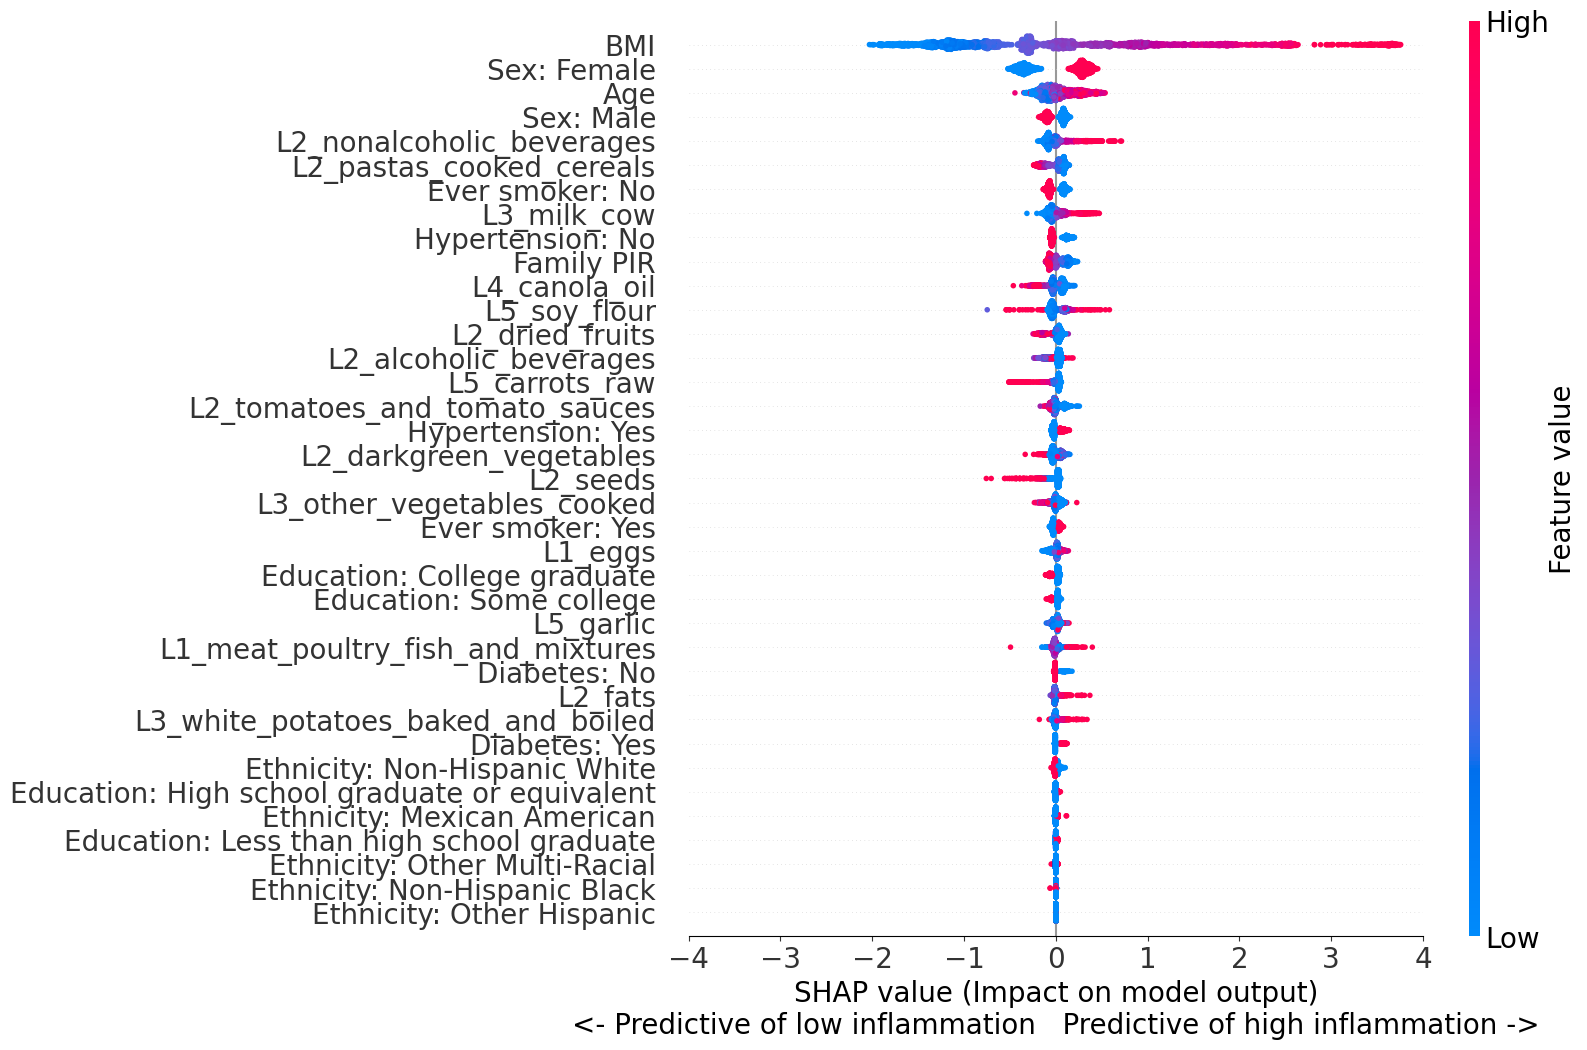

In [13]:
shap.summary_plot(shap_values, x_test, 
                 feature_names = new_names, plot_type = 'dot', max_display=37, show = False)

# Add this code
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(14, 10)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

ax = plt.gca()
ax.tick_params(labelsize=20)

ax.set_xlabel('SHAP value (Impact on model output)\n<- Predictive of low inflammation   Predictive of high inflammation ->', fontsize=20)
ax.set_ylabel('', fontsize=20)

# Get colorbar
cb_ax = plt.gcf().axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=20)
cb_ax.set_ylabel("Feature value", fontsize=20)

plt.xlim(-4, 4)


plt.savefig('shap_xgb_binary_class.png', bbox_inches='tight',dpi=1000)